In [1]:
import typing as t
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from matplotlib import cm


In [12]:
with open("/Scratch/al183/dynamic-dropout/experiment_logs/fmnist/0018_task_inference/5_loss_points.pickle", "rb") as f:
    loss_points = pickle.load(f)
    

In [26]:
# plt.plot()

df = pd.DataFrame(loss_points, columns=["id", "true_y", "Layer", "Experience", "Loss"])
df.sort_values("id")

,id,true_y,Layer,Experience,Loss
5381,0,1,0,0,0.176131
2875,0,1,4,0,0.320665
4264,0,1,2,0,0.252947
20713,0,1,1,0,0.258015
13505,0,1,3,0,0.277616
...,...,...,...,...,...
18167,9999,8,1,4,0.277548
9535,9999,8,4,4,0.240096
17497,9999,8,3,4,0.268775
42827,9999,8,2,4,0.275666


In [8]:
my_cm = cm.get_cmap("tab10")
my_cm(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

Text(0.5, 0, 'Binary Cross Entropy')

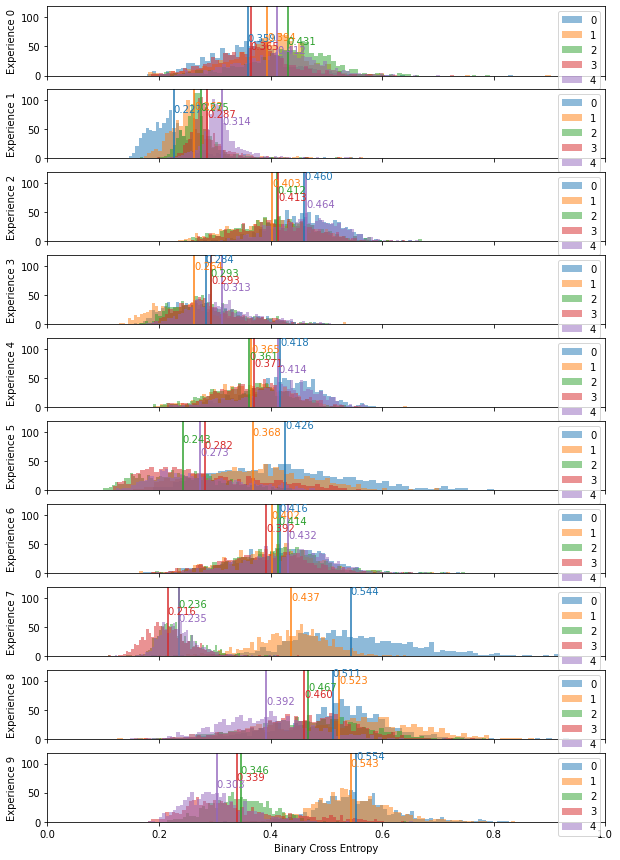

In [29]:
# df.hist()

fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 15), sharex=True, sharey=True)

for exp_id, axis in enumerate(axes): 
    for class_id in range(5):
        color = my_cm(class_id)
        layer = df[(df["Layer"] == class_id) & (df["true_y"] == exp_id)]

        axis.hist(layer["Loss"], bins=75, alpha=0.5, label=class_id, color=color)


        mean_bpd = layer["Loss"].mean()
        axis.axvline(mean_bpd, color=color)
        min_ylim, max_ylim = plt.ylim()
        axis.text(mean_bpd, max_ylim-(max_ylim/10)*(class_id+1), f'{mean_bpd:0.3f}', color=color)


    axis.set_ylabel(f"Experience {exp_id}")
    axis.set_xlim(0, 1.0)
    axis.legend(loc='upper right')
axes[-1].set_xlabel("Binary Cross Entropy")

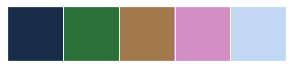

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.palplot(sns.color_palette("cubehelix", 5))